In [1]:
# Bartosz B 058085
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2gray
from skimage.io import imread


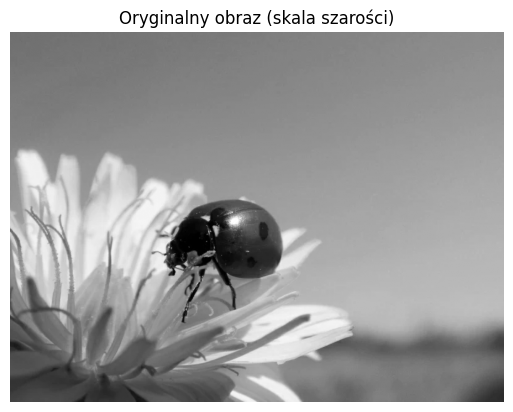

In [2]:
img = imread("1.webp")

gray = rgb2gray(img)

plt.imshow(gray, cmap='gray')
plt.title("Oryginalny obraz (skala szarości)")
plt.axis('off')
plt.show()

In [3]:
# SVD
U, S, VT = np.linalg.svd(gray, full_matrices=False)

# Zamiana wartości singularnych na macierz diagonalną
S_diag = np.diag(S)


In [4]:
# Całkowita energia
total_energy = np.sum(S**2)

# Energia skumulowana
cumulative_energy = np.cumsum(S**2)

# Minimalne k dla 90% energii
k = np.argmax(cumulative_energy >= 0.9 * total_energy) + 1

print(f"Minimalna liczba wartości singularnych potrzebna do zachowania 90% informacji: {k}")


Minimalna liczba wartości singularnych potrzebna do zachowania 90% informacji: 1


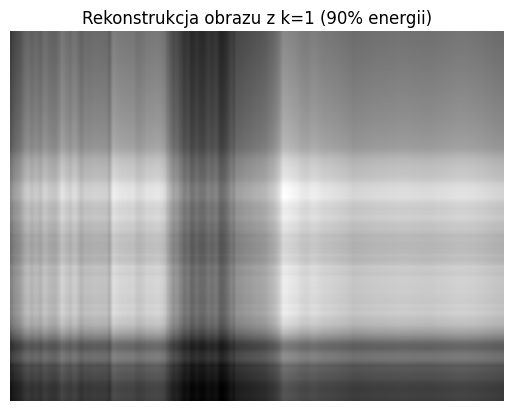

In [5]:
# Rekonstrukcja obrazu
U_k = U[:, :k]
S_k = np.diag(S[:k])
VT_k = VT[:k, :]

reconstructed = np.dot(U_k, np.dot(S_k, VT_k))

# Pokazanie zrekonstruowanego obrazu
plt.imshow(reconstructed, cmap='gray')
plt.title(f"Rekonstrukcja obrazu z k={k} (90% energii)")
plt.axis('off')
plt.show()
